# EDA Example

## Packages - install if needed

In [21]:
#! python -m pip install --upgrade pip

In [22]:
#! pip install swifter
#! pip install wordcloud
#! pip install spacy
#! pip install nltk -U
#! pip install missingno
#! pip install datasketch
#! pip install editdistance
#! pip install ppscore
#! pip install pandas -U
#! pip install seaborn -U
#! pip install networkx -U
#! pip install matplotlib -U
#! pip install statsmodels -U
#! pip install numpy -U
#! pip install tslearn -U
#! pip install scikit-learn==0.23.2
#! pip install pmdarima
#! pip install ruptures
#! pip install changefinder

## Imports

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = '14'

import numpy as np
import scipy as sp

import pandas as pd
import seaborn as sns

import ppscore as pps
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [59]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, Markdown

In [60]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [61]:
import eda_utils as eda

In [62]:
import importlib
importlib.reload(eda);

In [63]:
# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

# Load Data - from file

In [29]:
filename = "nasdaq_stocks.csv"
data = pd.read_csv(filename)
print(data.shape)
data.head(5)

(808, 18)


,date,FB,GOOGL,AMZN,DELL,IBM,INTC,AAPL,MSFT,CSCO,ORCL,NVDA,VMW,HPQ,AMD,TSM,TXN,QCOM
0,2016-01-04,102.22,759.44,636.99,NaN,119.2253,31.0178,99.4989,51.0656,23.9163,34.1057,31.8157,46.7698,10.5034,2.770,20.1865,49.9251,44.2740
1,2016-01-05,102.73,761.53,633.79,NaN,119.1376,30.8718,97.0055,51.2986,23.8076,34.0008,32.3268,47.3679,10.6030,2.750,20.0586,49.4014,43.4083
2,2016-01-06,102.97,759.33,632.65,NaN,118.5413,30.1874,95.1072,50.3667,23.5541,34.1725,30.9901,45.8975,10.2227,2.505,19.5012,49.0798,42.9666
3,2016-01-07,97.92,741.00,607.94,NaN,116.5155,29.0558,91.0932,48.6148,23.0107,33.4284,29.7615,45.2911,9.7519,2.275,19.2818,47.4996,40.7582
4,2016-01-08,97.33,730.91,607.05,NaN,115.4368,28.7547,91.5749,48.7639,22.4402,33.0563,29.1226,44.9422,9.5798,2.140,19.0168,46.2684,40.5241


# Try to infer Dates automatically

In [30]:
data = eda.infer_date_col(data, timezone_conversion=False)
data.head(3)

col: date was transformed to date


,date,FB,GOOGL,AMZN,DELL,IBM,INTC,AAPL,MSFT,CSCO,ORCL,NVDA,VMW,HPQ,AMD,TSM,TXN,QCOM
0,2016-01-04,102.22,759.44,636.99,NaN,119.2253,31.0178,99.4989,51.0656,23.9163,34.1057,31.8157,46.7698,10.5034,2.770,20.1865,49.9251,44.2740
1,2016-01-05,102.73,761.53,633.79,NaN,119.1376,30.8718,97.0055,51.2986,23.8076,34.0008,32.3268,47.3679,10.6030,2.750,20.0586,49.4014,43.4083
2,2016-01-06,102.97,759.33,632.65,NaN,118.5413,30.1874,95.1072,50.3667,23.5541,34.1725,30.9901,45.8975,10.2227,2.505,19.5012,49.0798,42.9666


# EDA for Mulitvariate Time Series
- Missing data visualization
- Basic EDA
- Correlations
- Correlation Network and clustering
- Autocorrleations
- Crosscorrelations with time lag

## Missing Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    808 non-null    datetime64[ns]
 1   FB      808 non-null    float64       
 2   GOOGL   808 non-null    float64       
 3   AMZN    808 non-null    float64       
 4   DELL    60 non-null     float64       
 5   IBM     808 non-null    float64       
 6   INTC    808 non-null    float64       
 7   AAPL    808 non-null    float64       
 8   MSFT    808 non-null    float64       
 9   CSCO    808 non-null    float64       
 10  ORCL    808 non-null    float64       
 11  NVDA    808 non-null    float64       
 12  VMW     808 non-null    float64       
 13  HPQ     808 non-null    float64       
 14  AMD     808 non-null    float64       
 15  TSM     808 non-null    float64       
 16  TXN     808 non-null    float64       
 17  QCOM    808 non-null    float64       
dtypes: datetim

None


Percentage of missing data:
col:date, missing values: 0.0%
col:FB, missing values: 0.0%
col:GOOGL, missing values: 0.0%
col:AMZN, missing values: 0.0%
col:DELL, missing values: 0.9257425742574258%
col:IBM, missing values: 0.0%
col:INTC, missing values: 0.0%
col:AAPL, missing values: 0.0%
col:MSFT, missing values: 0.0%
col:CSCO, missing values: 0.0%
col:ORCL, missing values: 0.0%
col:NVDA, missing values: 0.0%
col:VMW, missing values: 0.0%
col:HPQ, missing values: 0.0%
col:AMD, missing values: 0.0%
col:TSM, missing values: 0.0%
col:TXN, missing values: 0.0%
col:QCOM, missing values: 0.0%


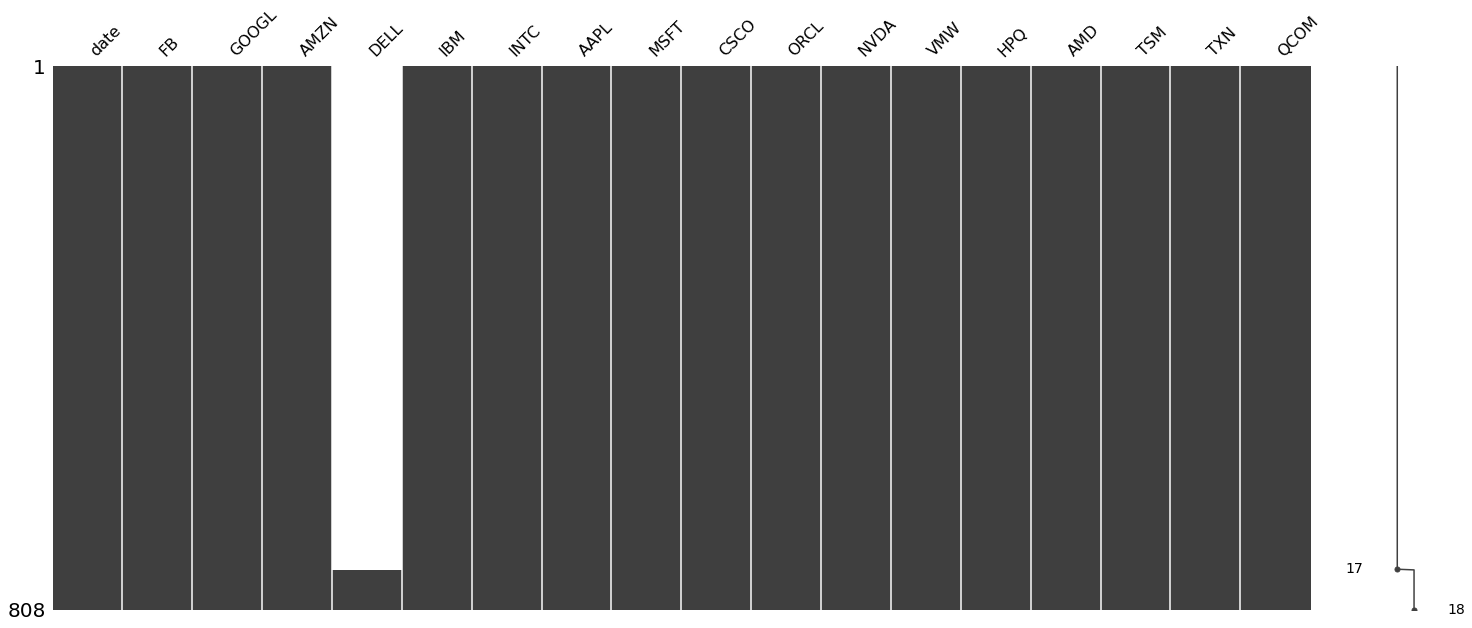

In [31]:
eda.missing_data(data)

# Infer Frequency

In [32]:
col_date = "date"
known_freq = 'B' # for possible frequencies: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases
max_date = data[col_date].max()
min_date = data[col_date].min()

rng = pd.date_range(start=min_date, end=max_date, periods=data.shape[0])
infered_freq = pd.infer_freq(rng, warn=True)
print("infered_freq:", infered_freq)

if infered_freq or known_freq:
    infered_freq = known_freq    
    rng_with_freq = pd.date_range(start=min_date, end=max_date, freq=infered_freq)
    if rng.shape[0] != rng_with_freq.shape[0]:
        print("There may be missing data:")
        print(rng.shape[0], rng_with_freq.shape[0])
        print("possible missing (%): ", (rng_with_freq.shape[0] - rng.shape[0]) / rng_with_freq.shape[0])
    else:
        print("Infered frequency matches the number of observations")

infered_freq: None
There may be missing data:
808 838
possible missing (%):  0.03579952267303103


# Plot time series

## Column: FB, dtype:float64

count: 808
nunique: 773
isnull sum: 0
zero count: 0
max: 217.5 min: 94.16


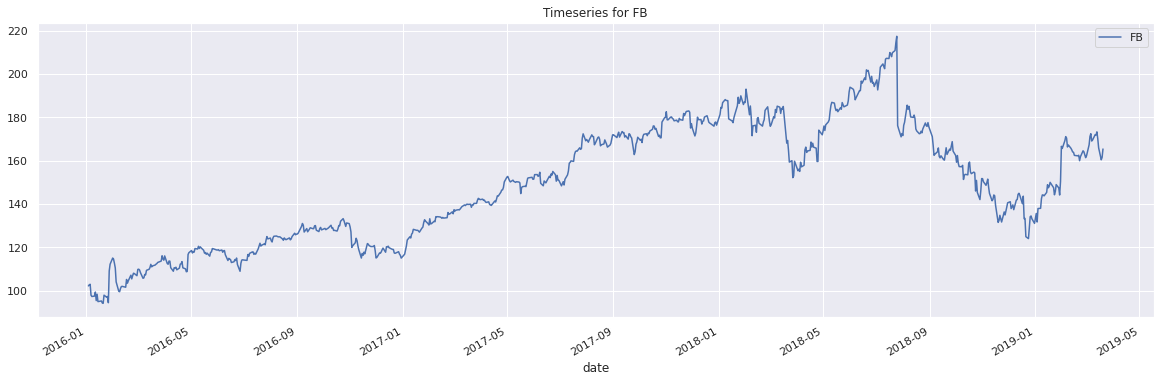

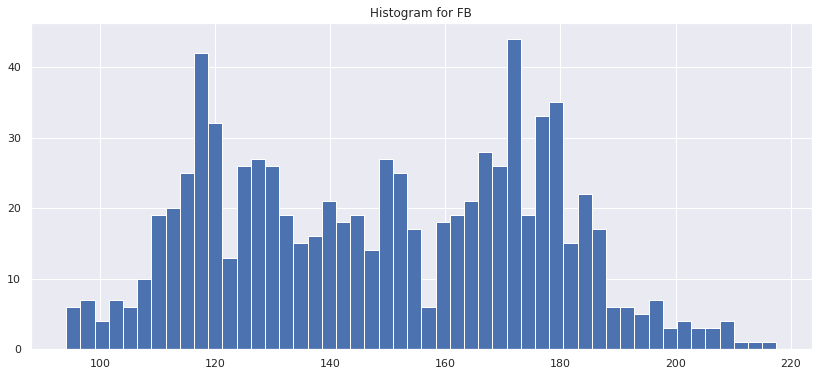

----

## Column: GOOGL, dtype:float64

count: 808
nunique: 799
isnull sum: 0
zero count: 0
max: 1285.5 min: 681.14


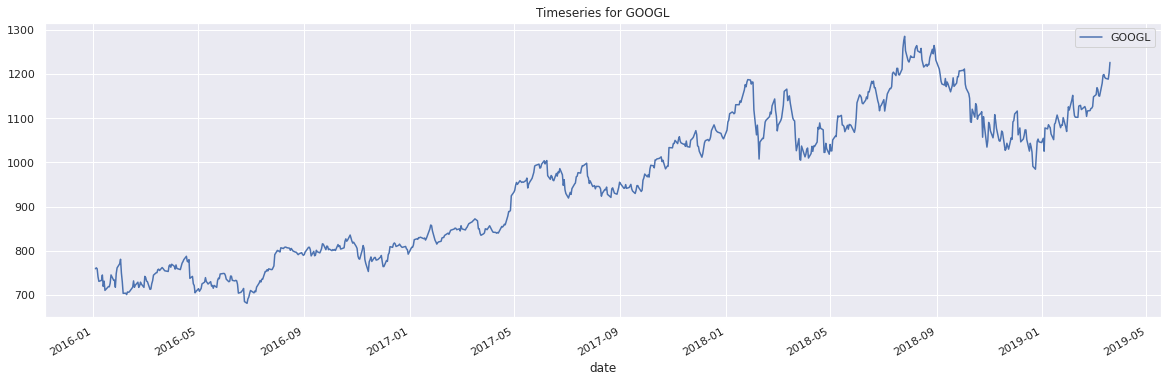

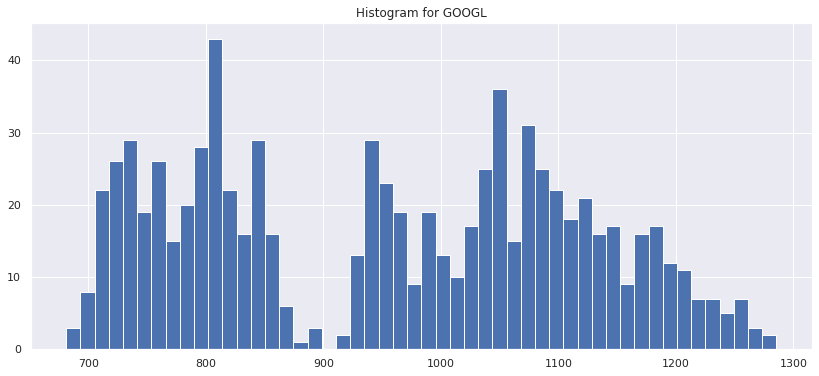

----

## Column: AMZN, dtype:float64

count: 808
nunique: 800
isnull sum: 0
zero count: 0
max: 2039.51 min: 482.07


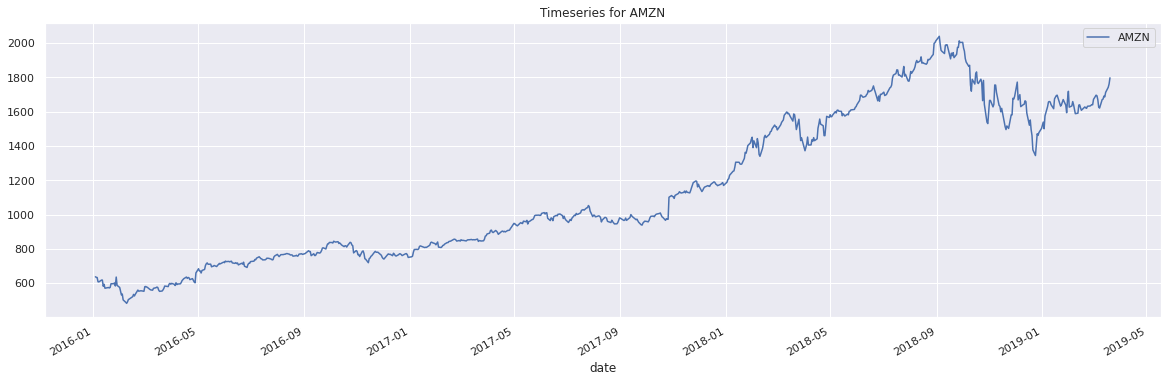

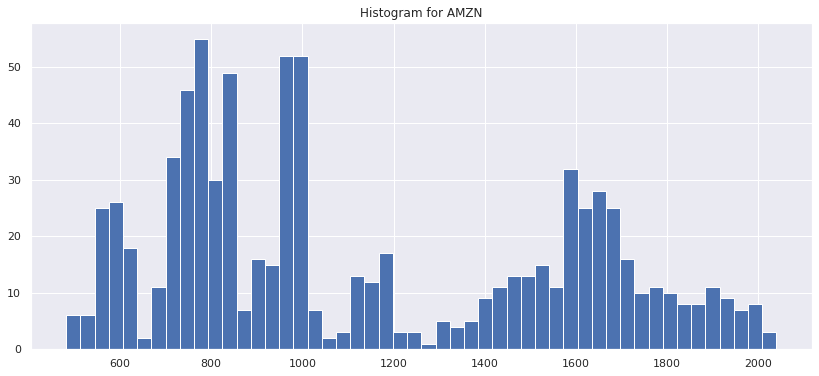

----

In [66]:
cols = ["date", "FB", "GOOGL", "AMZN"]
col_date = "date"
plotly_flag = False
sub_data = data[cols]
eda.eda_cols_vs_datetime_col(sub_data, col_date, plotly_flag)

# Plot Time Series with changepoints / breakpoints

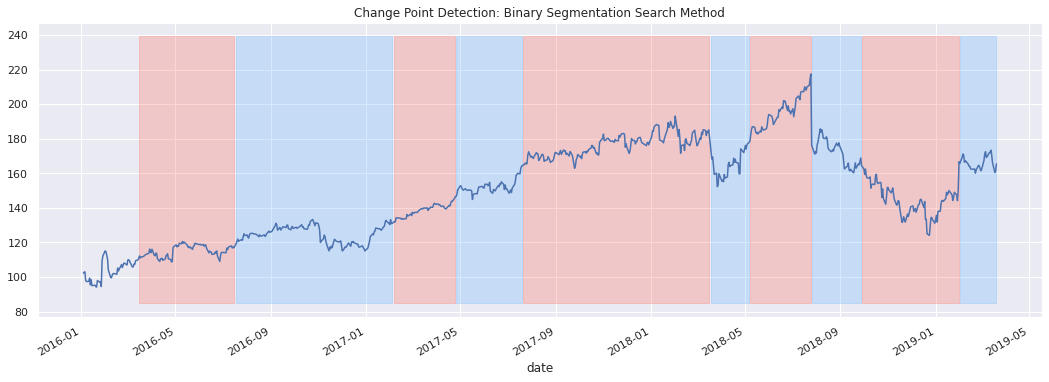

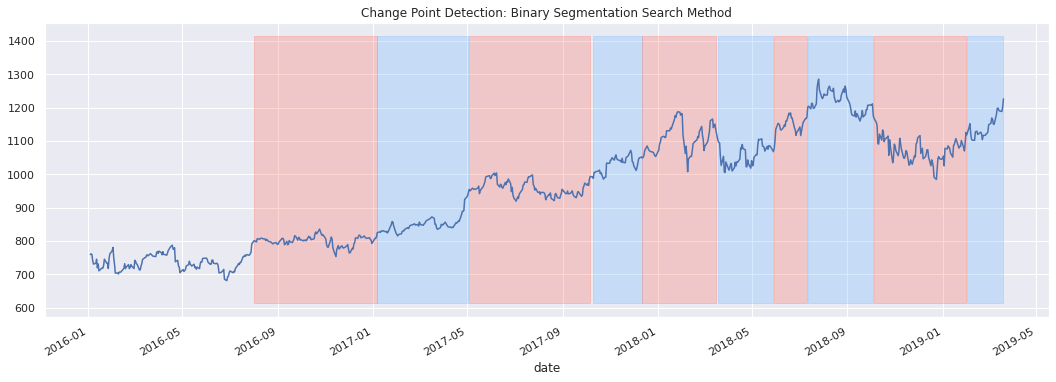

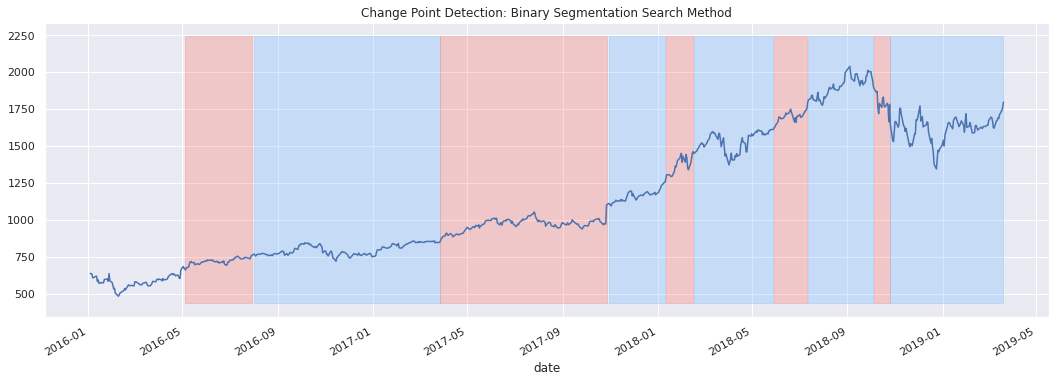

In [70]:
cols = ["FB", "GOOGL", "AMZN"]
for col in cols:
    #col = 'FB'
    col_date = 'date'
    series = pd.Series(data=data[col].values, index=data[col_date])
    modeltype="binary" # more options in function
    number_breakpoints=10
    plot_flag=True
    plot_with_dates=True #True
    show_time_flag=False
    result = eda.find_changepoints_for_time_series(series, modeltype, number_breakpoints, plot_flag, plot_with_dates, show_time_flag)   

# Plot Time Series with Outliers

## Column: FB, dtype:float64

count: 808
nunique: 773
isnull sum: 0
zero count: 0
max: 217.5 min: 94.16
percentage_of_outliers: 0.07673267326732673


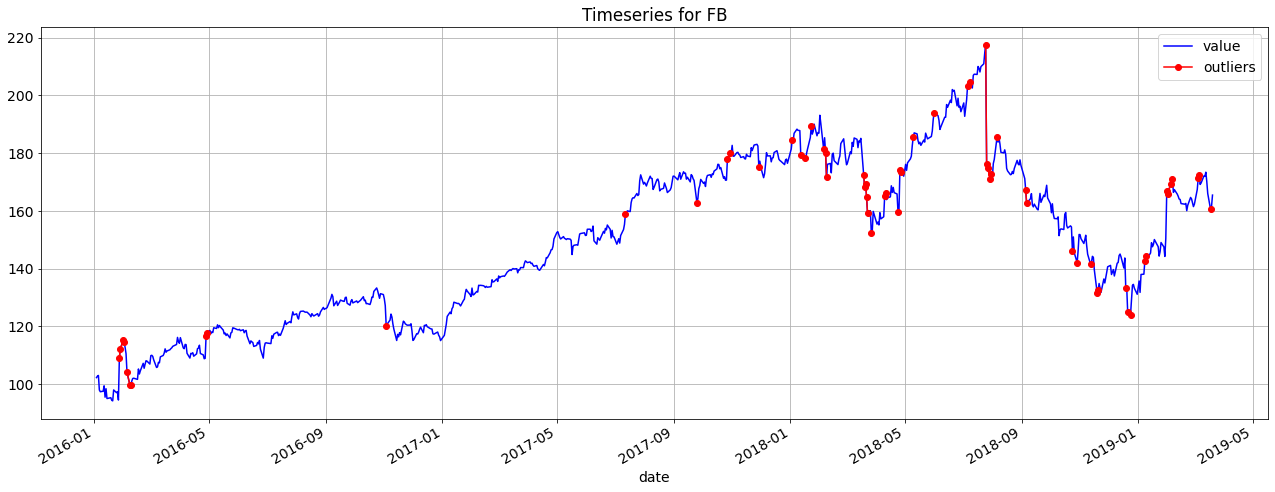

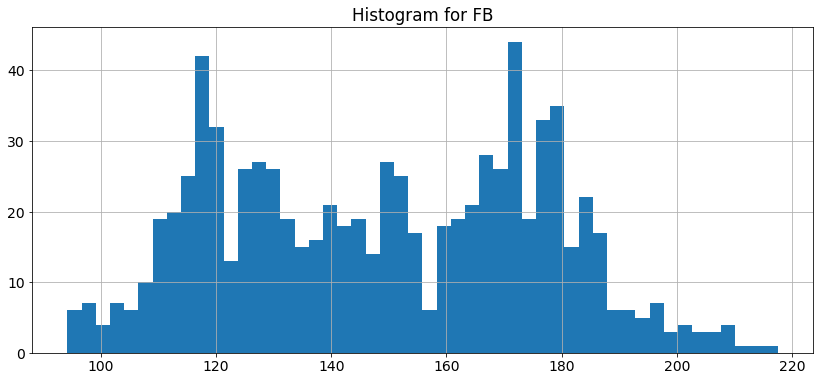

----

## Column: GOOGL, dtype:float64

count: 808
nunique: 799
isnull sum: 0
zero count: 0
max: 1285.5 min: 681.14
percentage_of_outliers: 0.04702970297029703


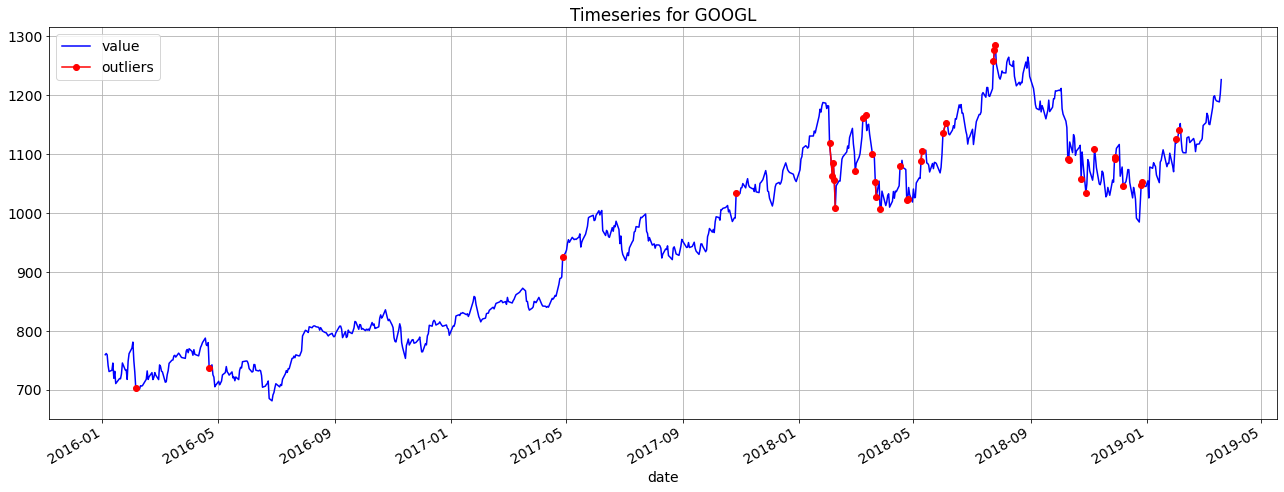

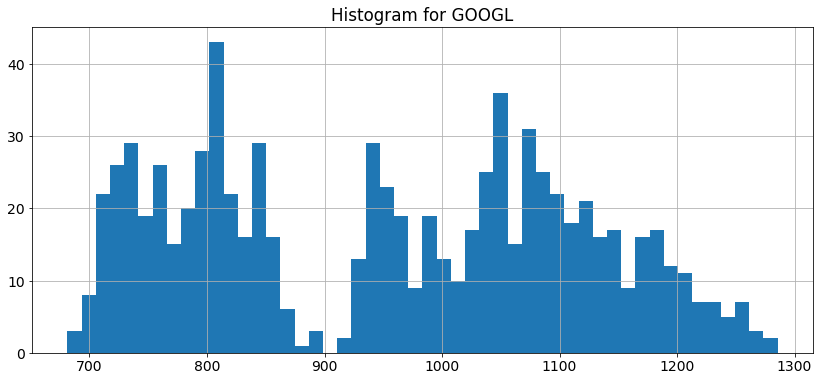

----

## Column: AMZN, dtype:float64

count: 808
nunique: 800
isnull sum: 0
zero count: 0
max: 2039.51 min: 482.07
percentage_of_outliers: 0.1051980198019802


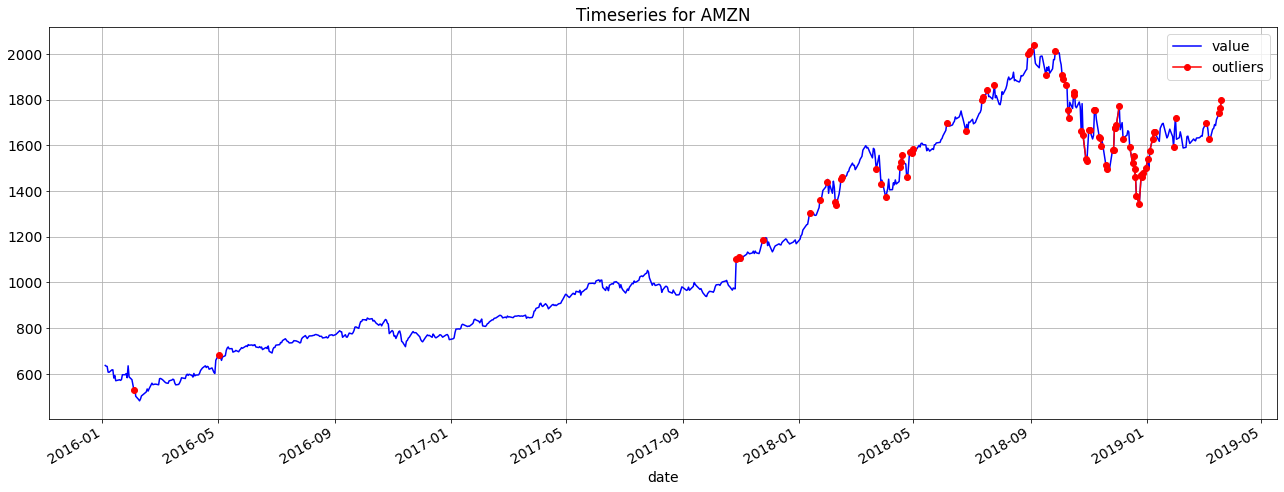

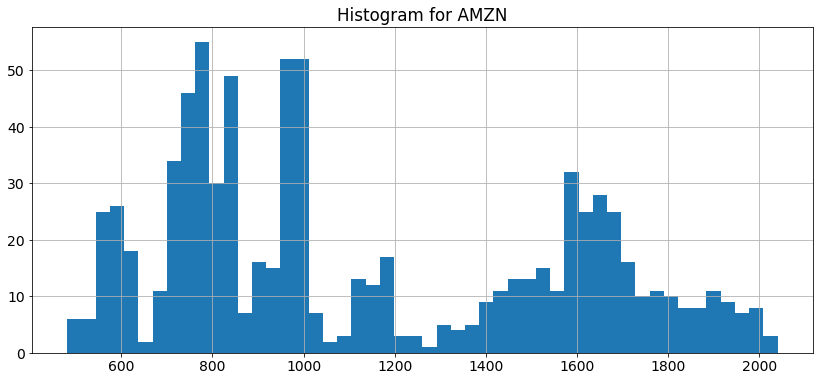

----

In [34]:
cols = ["date", "FB", "GOOGL", "AMZN"]
col_date = "date"
ma_window = 5
one_step_ahead_flag = False
show_limits_flag = False
sub_data = data[cols]
eda.eda_cols_vs_datetime_col_with_outliers(sub_data, col_date, ma_window, one_step_ahead_flag, show_limits_flag)

# Correlation matrix

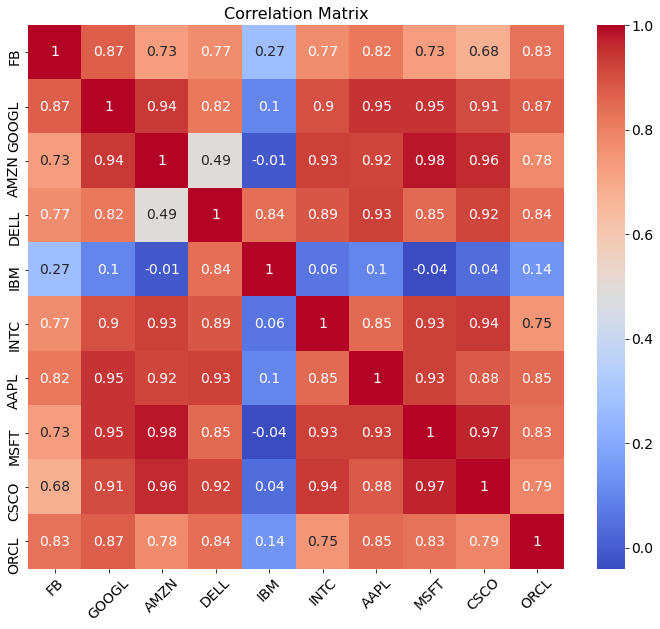

In [35]:
# Correlation matrix
col_numerical = list(data.select_dtypes([np.number]).columns)
corrMatrix = data[col_numerical[:10]].corr().round(2)
eda.plot_corrmatrix(corrMatrix, 'Correlation Matrix')

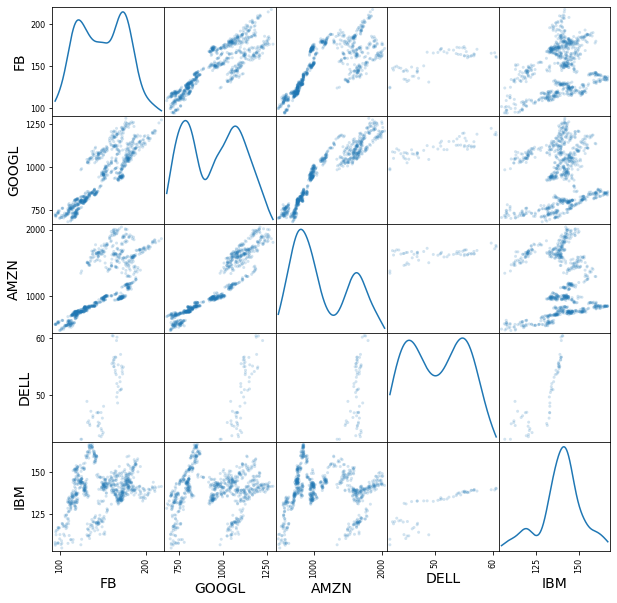

In [36]:
from pandas.plotting import scatter_matrix

col_numerical = list(data.select_dtypes([np.number]).columns)
scatter_matrix(data[col_numerical[:5]], alpha=0.2, figsize=(10, 10), diagonal='kde');

# Predictive power score matrix

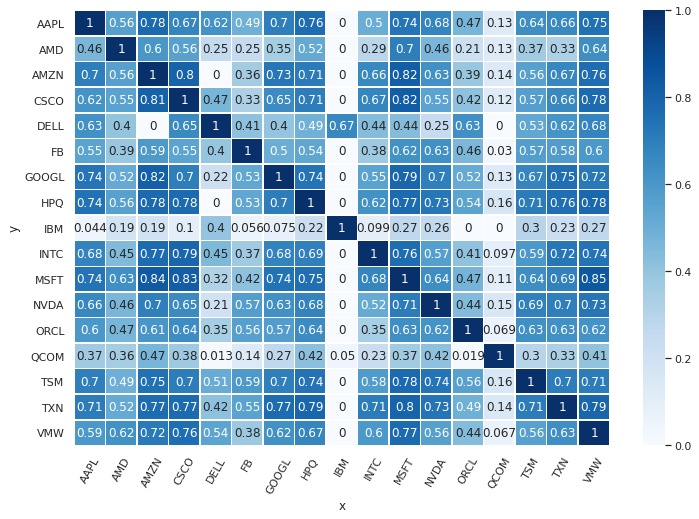

In [37]:
# Predictive power score matrix
sns.set(rc={'figure.figsize':(12,8)})
matrix_df = pps.matrix(data[col_numerical])[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sp = sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
sp.set_xticklabels(matrix_df.columns, rotation=60);

# Generate_column_correlation_network

## Communites:

['AAPL']
-------------------
['AMZN', 'CSCO', 'MSFT', 'VMW']
-------------------
['GOOGL', 'HPQ', 'TSM', 'TXN']
-------------------


## Network:

number of nodes: 9
number of edges: 13


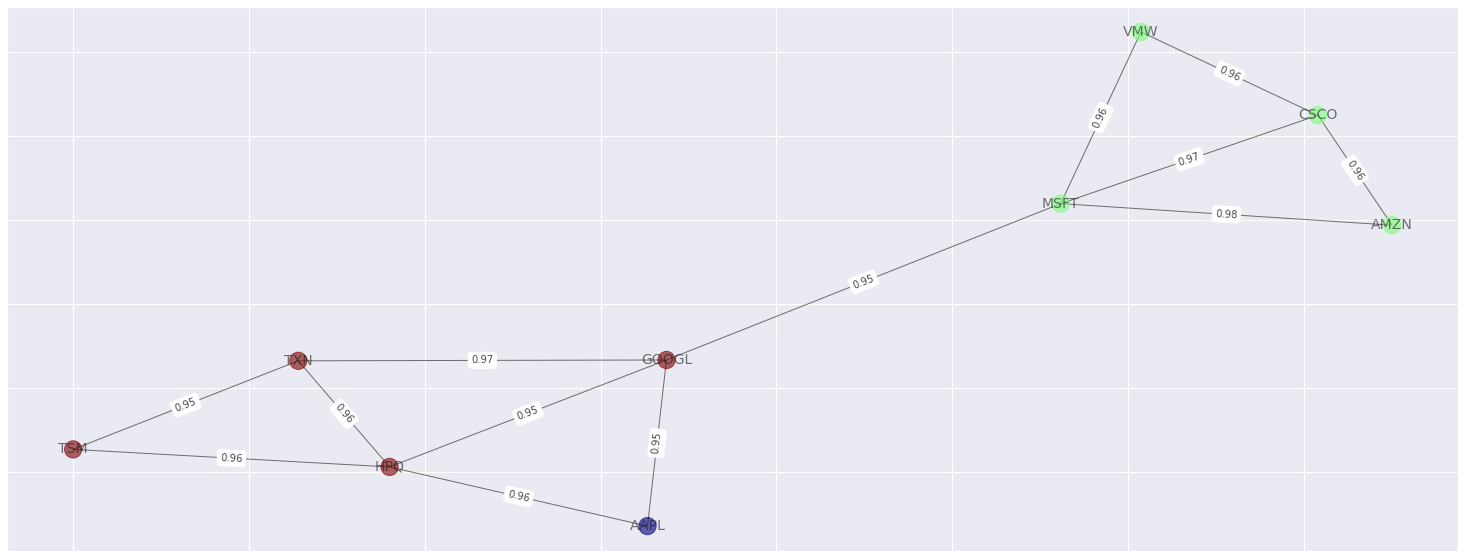

In [38]:
# Generate_column_correlation_network
corr_threshold = 0.95
edge_labels_flag=True
layout = 'spring_layout' #'circular_layout','spring_layout','planar_layout',
eda.generate_column_correlation_network(data, corr_threshold, edge_labels_flag, layout)

# Time Series Clustering

In [39]:
from sklearn import preprocessing
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler


col_numerical = list(data.select_dtypes([np.number]).columns)
df_cluster = data[col_numerical]
X_train = df_cluster.fillna(0).transpose().values

/usr/local/lib/python3.6/site-packages/tslearn/clustering/kmeans.py:17: UserWarning:

Scikit-learn <0.24 will be deprecated in a future release of tslearn



In [40]:
seed = 0
number_clusters = 5
metric = "dtw" # "euclidean" / "dtw" / "softdtw"
km = TimeSeriesKMeans(n_clusters=number_clusters, 
                      #verbose=True, 
                      metric=metric, 
                      #max_iter=10, 
                      n_init=2, 
                      random_state=seed)
y_pred = km.fit_predict(X_train)

cluster 1: DELL, INTC, CSCO, ORCL, HPQ, AMD, TSM, QCOM
cluster 2: GOOGL
cluster 3: AMZN
cluster 4: FB, IBM, AAPL, NVDA
cluster 5: MSFT, VMW, TXN


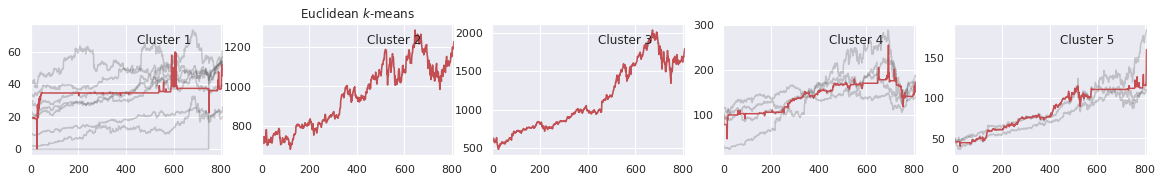

In [41]:
sz = X_train.shape[1]
plt.figure(figsize=(20,14))
for yi in range(number_clusters):
    plt.subplot(number_clusters, number_clusters, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    #plt.ylim(-10, 1500)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")
        
    print("cluster " + str(yi + 1) + ": " + ', '.join( list(df_cluster.columns[y_pred==yi]) ))  

# Autocorrelation

## Col: FB

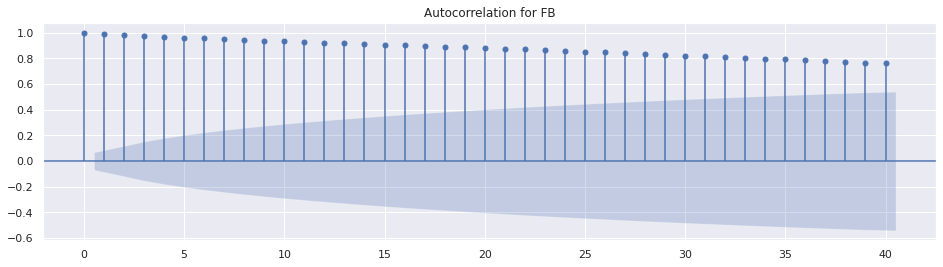

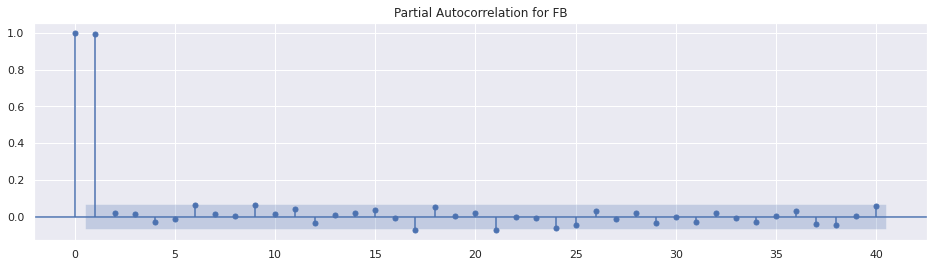

----

## Col: GOOGL

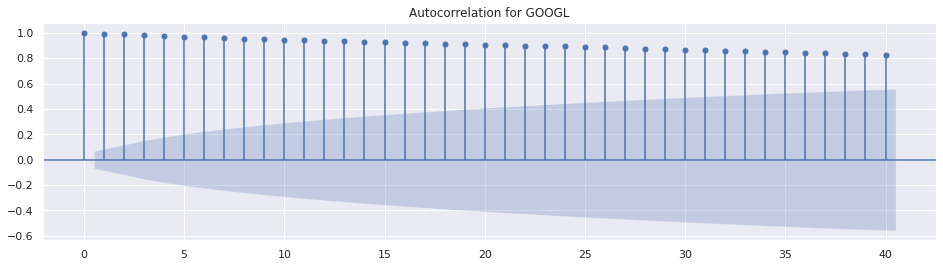

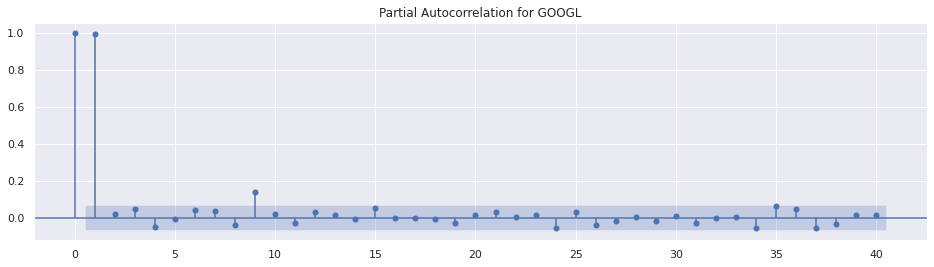

----

## Col: AMZN

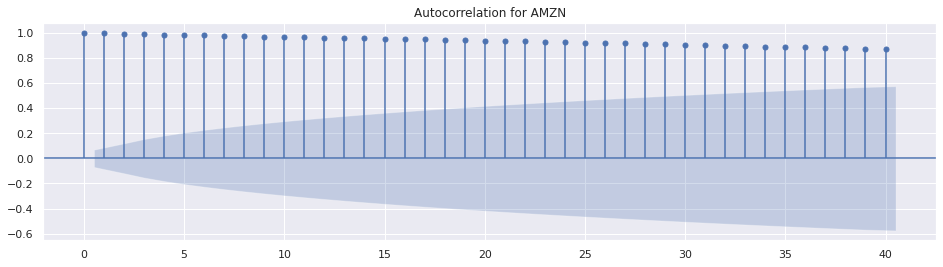

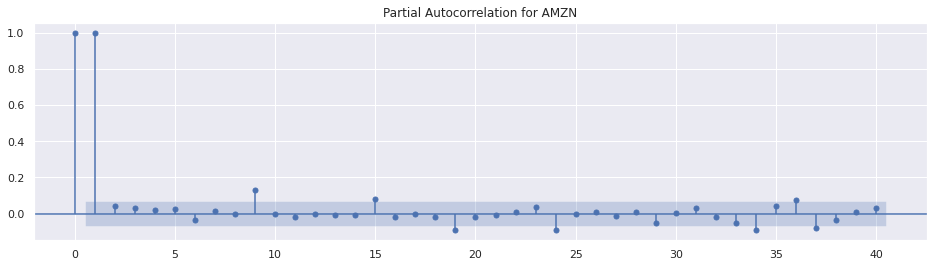

----

In [71]:
plt.rc('figure',figsize=(16,4))
plt.rc('font',size=13)

diff_one_flag = False
#for col in col_numerical:
for col in ["FB", "GOOGL", "AMZN"]:
    if diff_one_flag:
        series = data[col].diff(1)
    else:
        series = data[col]
    display(Markdown("## Col: " + col))

    #fig, ax = plt.subplots(figsize=(14,6))
    sm.graphics.tsa.plot_acf(series, lags=40);
    plt.title("Autocorrelation for " + col)
    plt.show()
    
    #fig, ax = plt.subplots(figsize=(14,6))
    sm.graphics.tsa.plot_pacf(series, lags=40);
    plt.title("Partial Autocorrelation for " + col)
    plt.show()

    display(Markdown("----"))

# Seasonal Decompose

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rc('figure',figsize=(10,8))
plt.rc('font',size=13)


options_list = col_numerical

w_dropdown = widgets.Dropdown(
    options=options_list,
    value=options_list[0],
    description='Column:',
    disabled=False,
)

w_inttext = widgets.BoundedIntText(
    value=24,
    min=0,
    max=int(data.shape[0]/3),
    step=1,
    description='Periods:',
    disabled=False
)

def display_plot(x, w_inttext_value):
    col = str(x)
    if col in col_numerical:
        series = data[col]
        result = seasonal_decompose(series, model='additive', period=w_inttext_value)
        result.plot();
    else:
        print("[Error] column:" + col, "is not numerical")

display(Markdown("# Choose numerical column for plotting seasonal_decompose"))
interact(display_plot, x=w_dropdown, w_inttext_value=w_inttext);

# Choose numerical column for plotting seasonal_decompose

interactive(children=(Dropdown(description='Column:', options=('FB', 'GOOGL', 'AMZN', 'DELL', 'IBM', 'INTC', '…

# Cross Correlation with Time Lags

In [44]:
import itertools

def get_best_lag_cross_correlation_for_two_series(series1, series2, maxlag):
    best_lag = 0
    abs_score = 0
    score = 0
    for i in range(-maxlag, maxlag):
        shifted_series = series1.shift(i)
        corr = shifted_series.corr(series2)
        if abs(corr) > abs_score:
            abs_score = abs(corr)
            score = corr
            best_lag = i
        #print(i, corr)
    return(best_lag, abs_score, score)    
        
def get_best_lag_cross_correlation_for_df(df, maxlag, diff_one_flag):
    col_numerical = list(df.select_dtypes([np.number]).columns)
    list_comb = list(itertools.combinations(col_numerical, 2))
    for p in list_comb:
        series1 = df[p[0]]
        series2 = df[p[1]]
        if diff_one_flag:
            best_lag, abs_score, score = get_best_lag_cross_correlation_for_two_series(series1.diff(1), series2.diff(1), maxlag)
        else:
            best_lag, abs_score, score = get_best_lag_cross_correlation_for_two_series(series1, series2, maxlag)
        if best_lag !=0:
            print("col1:", p[0], "col2:", p[1], "best_lag:", best_lag, "abs_score:", abs_score, "corr:", score)

maxlag = 10  
diff_one_flag = False
get_best_lag_cross_correlation_for_df(data, maxlag, diff_one_flag)        
#get_best_lag_cross_correlation_for_two_series(series1, series2, 5)

col1: FB col2: GOOGL best_lag: 3 abs_score: 0.869274075978792 corr: 0.869274075978792
col1: FB col2: AMZN best_lag: 9 abs_score: 0.7455662693601888 corr: 0.7455662693601888
col1: FB col2: DELL best_lag: 9 abs_score: 0.8884485236453538 corr: 0.8884485236453538
col1: FB col2: AAPL best_lag: 9 abs_score: 0.8378450936426046 corr: 0.8378450936426046
col1: FB col2: MSFT best_lag: 9 abs_score: 0.7428836554195072 corr: 0.7428836554195072
col1: FB col2: CSCO best_lag: 9 abs_score: 0.6860508585975338 corr: 0.6860508585975338
col1: FB col2: NVDA best_lag: 9 abs_score: 0.9172306080955073 corr: 0.9172306080955073
col1: FB col2: VMW best_lag: -7 abs_score: 0.7152482316770018 corr: 0.7152482316770018
col1: FB col2: HPQ best_lag: 9 abs_score: 0.8534387384799355 corr: 0.8534387384799355
col1: FB col2: AMD best_lag: 9 abs_score: 0.5653247810930392 corr: 0.5653247810930392
col1: FB col2: TSM best_lag: 9 abs_score: 0.8915771242733437 corr: 0.8915771242733437
col1: FB col2: QCOM best_lag: 9 abs_score: 0.45

<AxesSubplot:>

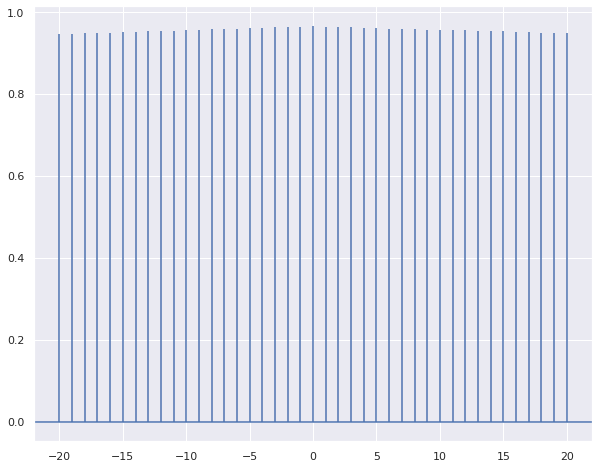

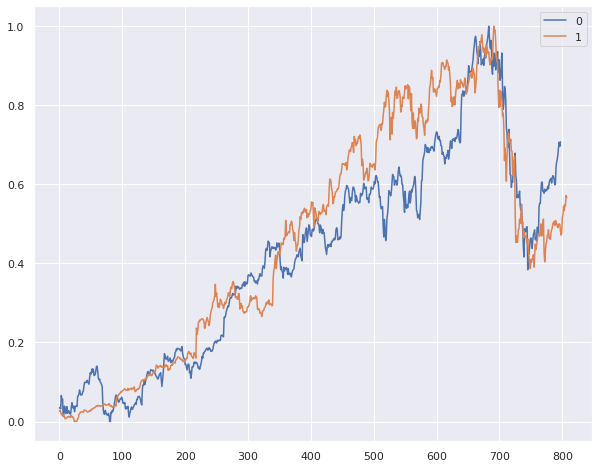

In [45]:
from sklearn.preprocessing import MinMaxScaler

series1 = data["AAPL"]  
series2 = data["NVDA"]
plt.xcorr(series1, series2, maxlags=20);

scaler = MinMaxScaler()    
df_tmp = pd.DataFrame()
df_tmp["s1"] = series1.shift(-10)
df_tmp["s2"] = series2
df_tmp2 = scaler.fit_transform(df_tmp)
pd.DataFrame(df_tmp2).plot()

# box-cox transformation

In [46]:
import pmdarima as pm
from pmdarima import datasets
from pmdarima import preprocessing

options_list = col_numerical

w_dropdown = widgets.Dropdown(
    options=options_list,
    value=options_list[0],
    description='Column:',
    disabled=False,
)


def display_series_info(x):
    col = str(x)
    if col in col_numerical:
        y = data[col]
        print("Data shape: {}".format(y.shape[0]))
        print("Data head:")
        print(y.head())

        # Let's look at the series, its ACF plot, and a histogram of its values
        pm.tsdisplay(y, lag_max=90, title=col, show=True)

        # box-cox transformation
        y_bc, _ = preprocessing.BoxCoxEndogTransformer(lmbda2=1e-6).fit_transform(y)
        pm.tsdisplay(
            y_bc, lag_max=90, title=col + " (BoxCox-transformed)", show=True)
    else:
        print("[Error] column:" + col, "is not numerical")

display(Markdown("# Choose numerical column for plotting box-plot transformation"))
interact(display_series_info, x=w_dropdown);

# Choose numerical column for plotting box-plot transformation

interactive(children=(Dropdown(description='Column:', options=('FB', 'GOOGL', 'AMZN', 'DELL', 'IBM', 'INTC', '…